# Importing Libraries and Dataset

In [103]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn as sk
from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
import pickle
import tenseal as ts

In [2]:
pd.options.display.max_rows = 80

In [3]:
folder_path = r"C:\Users\invite1\Downloads\CIC IDS Dataset\MachineLearningCVE" #folder path which contains all the CSV files
csv = [i for i in os.listdir(folder_path) if i.endswith(".csv")]
dfs = []
for i in csv:
    file_path = os.path.join(folder_path, i)
    temp_df = pd.read_csv(file_path)
    dfs.append(temp_df)
df = pd.concat(dfs, ignore_index = True)

# Preprocessing

In [4]:
df.columns = df.columns.str.strip()
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [5]:
df.shape

(2830743, 79)

In [6]:
df.dtypes

Destination Port                 int64
Flow Duration                    int64
Total Fwd Packets                int64
Total Backward Packets           int64
Total Length of Fwd Packets      int64
Total Length of Bwd Packets      int64
Fwd Packet Length Max            int64
Fwd Packet Length Min            int64
Fwd Packet Length Mean         float64
Fwd Packet Length Std          float64
Bwd Packet Length Max            int64
Bwd Packet Length Min            int64
Bwd Packet Length Mean         float64
Bwd Packet Length Std          float64
Flow Bytes/s                   float64
Flow Packets/s                 float64
Flow IAT Mean                  float64
Flow IAT Std                   float64
Flow IAT Max                     int64
Flow IAT Min                     int64
Fwd IAT Total                    int64
Fwd IAT Mean                   float64
Fwd IAT Std                    float64
Fwd IAT Max                      int64
Fwd IAT Min                      int64
Bwd IAT Total            

In [7]:
df.isnull().sum()

Destination Port                  0
Flow Duration                     0
Total Fwd Packets                 0
Total Backward Packets            0
Total Length of Fwd Packets       0
Total Length of Bwd Packets       0
Fwd Packet Length Max             0
Fwd Packet Length Min             0
Fwd Packet Length Mean            0
Fwd Packet Length Std             0
Bwd Packet Length Max             0
Bwd Packet Length Min             0
Bwd Packet Length Mean            0
Bwd Packet Length Std             0
Flow Bytes/s                   1358
Flow Packets/s                    0
Flow IAT Mean                     0
Flow IAT Std                      0
Flow IAT Max                      0
Flow IAT Min                      0
Fwd IAT Total                     0
Fwd IAT Mean                      0
Fwd IAT Std                       0
Fwd IAT Max                       0
Fwd IAT Min                       0
Bwd IAT Total                     0
Bwd IAT Mean                      0
Bwd IAT Std                 

In [8]:
df.replace([np.inf, -np.inf], np.nan, inplace = True)

In [9]:
df.isnull().sum()

Destination Port                  0
Flow Duration                     0
Total Fwd Packets                 0
Total Backward Packets            0
Total Length of Fwd Packets       0
Total Length of Bwd Packets       0
Fwd Packet Length Max             0
Fwd Packet Length Min             0
Fwd Packet Length Mean            0
Fwd Packet Length Std             0
Bwd Packet Length Max             0
Bwd Packet Length Min             0
Bwd Packet Length Mean            0
Bwd Packet Length Std             0
Flow Bytes/s                   2867
Flow Packets/s                 2867
Flow IAT Mean                     0
Flow IAT Std                      0
Flow IAT Max                      0
Flow IAT Min                      0
Fwd IAT Total                     0
Fwd IAT Mean                      0
Fwd IAT Std                       0
Fwd IAT Max                       0
Fwd IAT Min                       0
Bwd IAT Total                     0
Bwd IAT Mean                      0
Bwd IAT Std                 

In [10]:
df.groupby('Label')['Label'].count()

Label
BENIGN                        2273097
Bot                              1966
DDoS                           128027
DoS GoldenEye                   10293
DoS Hulk                       231073
DoS Slowhttptest                 5499
DoS slowloris                    5796
FTP-Patator                      7938
Heartbleed                         11
Infiltration                       36
PortScan                       158930
SSH-Patator                      5897
Web Attack � Brute Force         1507
Web Attack � Sql Injection         21
Web Attack � XSS                  652
Name: Label, dtype: int64

In [11]:
df.groupby('Label').apply(lambda x:x.isnull().sum().sum())

Label
BENIGN                        3554
Bot                             20
DDoS                             4
DoS GoldenEye                    0
DoS Hulk                      1898
DoS Slowhttptest                 0
DoS slowloris                    0
FTP-Patator                      6
Heartbleed                       0
Infiltration                     0
PortScan                       252
SSH-Patator                      0
Web Attack � Brute Force         0
Web Attack � Sql Injection       0
Web Attack � XSS                 0
dtype: int64

In [12]:
df.isnull().sum().sum()

5734

In [13]:
# Filling the null values present in a columns by taking the mean of a particular class to which the null values belong in the target class
# for i in df.columns:
#     if df[i].isnull().sum() > 0:
#         for j in df["Label"].unique():
#             j_mean = df[df["Label"] == j][i].mean()
#             # print(i, j, j_mean, df[df["Label"] == j][i].median())
#             df.loc[(df["Label"] == j) & (df[i].isnull()), i] = j_mean

# duplicate_rows = df[df.duplicated()]
# print(len(duplicate_rows))
# df.drop_duplicates(inplace=True)
# print(df.shape)

In [14]:
# Instead, I found it better to drop rather than replacing them because null values are less than 1% for each class and Duplicates are not dropped
df.dropna(inplace = True)
df.isnull().sum().sum()

0

In [15]:
total_malicious  = 0
for i in range(1, len(df.groupby('Label')['Label'].count())):
    total_malicious += df.groupby('Label')['Label'].count()[i]
print(total_malicious)

556556


In [16]:
temp_class_list = [i for i in df["Label"] if i!="BENIGN"]
temp_class_list = [*set(temp_class_list)]
df.replace(temp_class_list, "MALICIOUS", inplace=True)

In [17]:
def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(",".join(result))
        
def analyze(df):
    cols = df.columns.values
    total = float(len(df))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if unique_count>100:
            print("--> {}:{} ({}%)".format(col,unique_count,int(((unique_count)/total)*100)))
        else:
            print("--> {}:{}".format(col,expand_categories(df[col])))
            expand_categories(df[col])

In [18]:
analyze(df)

--> Destination Port:53791 (1%)
--> Flow Duration:1050898 (37%)
--> Total Fwd Packets:1432 (0%)
--> Total Backward Packets:1747 (0%)
--> Total Length of Fwd Packets:17928 (0%)
--> Total Length of Bwd Packets:64698 (2%)
--> Fwd Packet Length Max:5279 (0%)
--> Fwd Packet Length Min:384 (0%)
--> Fwd Packet Length Mean:99716 (3%)
--> Fwd Packet Length Std:253909 (8%)
--> Bwd Packet Length Max:4838 (0%)
--> Bwd Packet Length Min:583 (0%)
--> Bwd Packet Length Mean:147614 (5%)
--> Bwd Packet Length Std:248869 (8%)
--> Flow Bytes/s:1593907 (56%)
--> Flow Packets/s:1240163 (43%)
--> Flow IAT Mean:1166310 (41%)
--> Flow IAT Std:1056642 (37%)
--> Flow IAT Max:580288 (20%)
--> Flow IAT Min:136316 (4%)
--> Fwd IAT Total:493098 (17%)
--> Fwd IAT Mean:737737 (26%)
--> Fwd IAT Std:700313 (24%)
--> Fwd IAT Max:437316 (15%)
--> Fwd IAT Min:110631 (3%)
--> Bwd IAT Total:414928 (14%)
--> Bwd IAT Mean:670824 (23%)
--> Bwd IAT Std:709042 (25%)
--> Bwd IAT Max:368285 (13%)
--> Bwd IAT Min:66074 (2%)
--> Fwd

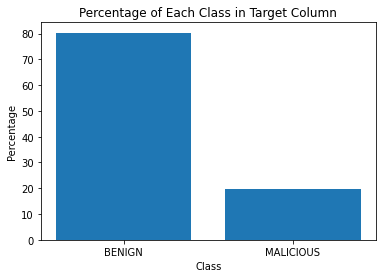

In [19]:
class_percentages = df["Label"].value_counts() / df["Label"].value_counts().sum() * 100
plt.bar(class_percentages.index, class_percentages.values)
plt.title("Percentage of Each Class in Target Column")
plt.xlabel("Class")
plt.ylabel("Percentage")
plt.show()

In [20]:
df.shape

(2827876, 79)

In [21]:
label_encoder = preprocessing.LabelEncoder()
df['Label']= label_encoder.fit_transform(df['Label'])
df['Label'].unique()

array([0, 1])

# Feature Selection

In [22]:
X = df.drop(["Label"], axis = 1)
y = df["Label"]

In [23]:
# rfr = RandomForestRegressor(random_state=0)
# rfr.fit(X, y)

In [24]:
# rfc = RandomForestClassifier()
# rfc.fit(X, y)

In [25]:
# dtc = DecisionTreeClassifier()
# dtc.fit(X, y)

In [26]:
# with open('rfc_model.pkl', 'wb') as fw1:
#     pickle.dump(rfc, fw1)
# with open('rfr_model.pkl', 'wb') as fw2:
#     pickle.dump(rfr, fw2)
# with open('dtc_model.pkl', 'wb') as fw3:
#     pickle.dump(dtc, fw3)

In [27]:
with open('rfr_model.pkl', 'rb') as fr1:
    rfr = pickle.load(fr1)
with open('rfc_model.pkl', 'rb') as fr2:
    rfc = pickle.load(fr2)
with open('dtc_model.pkl', 'rb') as fr3:
    dtc = pickle.load(fr3)

In [28]:
rfr.feature_importances_

array([1.03054539e-01, 4.04120615e-04, 2.79196847e-04, 3.68205690e-05,
       5.85113219e-04, 3.05727429e-04, 3.69272396e-03, 5.01149204e-04,
       1.27408763e-04, 9.54197968e-03, 3.22332413e-04, 3.80393968e-04,
       7.40252850e-04, 3.76869084e-01, 5.19691526e-04, 5.54387520e-04,
       1.85681058e-03, 8.10521414e-04, 2.59050202e-04, 3.83262042e-03,
       3.08503330e-04, 1.03620910e-03, 1.84046975e-04, 3.26732884e-03,
       5.35980706e-03, 3.78841457e-05, 1.69794210e-03, 1.97030571e-03,
       7.46705961e-05, 5.04895277e-04, 5.03192089e-05, 0.00000000e+00,
       5.34495892e-07, 0.00000000e+00, 6.49006682e-04, 1.32152741e-01,
       7.87442080e-04, 1.01885727e-03, 3.90772801e-04, 9.32754277e-02,
       1.23512817e-03, 2.61171638e-04, 3.52909568e-04, 4.57099317e-05,
       4.67649538e-06, 0.00000000e+00, 7.16855428e-05, 4.04441199e-05,
       3.18196047e-04, 4.46458564e-07, 0.00000000e+00, 2.24834268e-04,
       1.89145619e-01, 1.28922347e-04, 8.86326681e-04, 6.86349019e-04,
      

In [29]:
rfc.feature_importances_

array([5.97099675e-02, 1.06793051e-02, 1.17295445e-02, 7.43995433e-03,
       3.56135506e-02, 1.99032813e-02, 2.04154720e-02, 3.61358967e-03,
       1.56718243e-02, 3.55888509e-03, 1.97200274e-02, 9.49574435e-03,
       4.64719389e-02, 5.31854242e-02, 8.91645040e-03, 9.50473030e-03,
       8.28436024e-03, 4.58995546e-03, 1.55775727e-02, 4.66382386e-03,
       8.30243808e-03, 6.77193099e-03, 9.52605594e-03, 9.83042374e-03,
       9.91579076e-03, 1.92856930e-03, 4.79942794e-03, 1.02908781e-03,
       2.61300916e-03, 4.53102028e-03, 6.16387584e-04, 0.00000000e+00,
       1.83726984e-05, 0.00000000e+00, 1.18023614e-02, 1.26168760e-02,
       5.54155099e-03, 1.00851320e-02, 9.11628663e-03, 2.68501558e-02,
       3.44893045e-02, 5.87650266e-02, 4.94464581e-02, 1.31548652e-03,
       4.35455527e-04, 0.00000000e+00, 8.85417442e-03, 2.11155972e-03,
       5.11039771e-03, 3.90020151e-06, 1.09353503e-07, 3.37216491e-03,
       5.48280631e-02, 1.77742609e-02, 5.01432060e-02, 2.05181382e-02,
      

In [30]:
dtc.feature_importances_

array([1.01615685e-01, 1.94272253e-04, 3.04108374e-05, 1.48410718e-05,
       3.01180852e-04, 4.30659753e-06, 4.88066809e-03, 9.49009334e-04,
       6.91991365e-06, 9.46941673e-03, 1.10107380e-04, 1.66909065e-05,
       1.70649685e-03, 3.76959708e-01, 4.74172200e-04, 1.09519541e-03,
       3.49146452e-03, 8.07774459e-04, 1.64005312e-04, 3.33315383e-03,
       5.53378501e-04, 1.15447710e-04, 1.96820330e-04, 3.32811284e-03,
       5.37875015e-03, 4.42448870e-05, 2.11604364e-03, 1.96087750e-03,
       6.78767379e-05, 1.01791136e-04, 4.47264483e-06, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.01284155e-04, 1.32170359e-01,
       2.67261896e-04, 4.86375048e-04, 3.02757549e-04, 9.30657180e-02,
       1.15859592e-03, 1.29340234e-03, 1.14317028e-05, 8.98183110e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.57695620e-04,
       3.21123985e-04, 0.00000000e+00, 0.00000000e+00, 5.30247659e-04,
       1.89208471e-01, 1.14220246e-04, 7.62479582e-04, 8.38763513e-04,
      

In [31]:
feature_importances_df = pd.DataFrame({'Feature': [i for i in df.columns if i != "Label"], 'Importance': rfc.feature_importances_})
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)
top_39_features = feature_importances_df.head(39)
top_39_features = top_39_features.reset_index(drop=True)
top_39_features

,Feature,Importance
0,Destination Port,0.059710
1,Packet Length Std,0.058765
2,Average Packet Size,0.054828
3,Bwd Packet Length Std,0.053185
4,Avg Bwd Segment Size,0.050143
5,Packet Length Variance,0.049446
6,Bwd Packet Length Mean,0.046472
7,Total Length of Fwd Packets,0.035614
8,Packet Length Mean,0.034489
9,Subflow Bwd Bytes,0.031675


In [32]:
top_feature_names = top_39_features['Feature'].tolist()
top_feature_names.append("Label")
top_feature_df = df[top_feature_names]
print(top_feature_df.shape)

(2827876, 40)


# Correlation Analysis

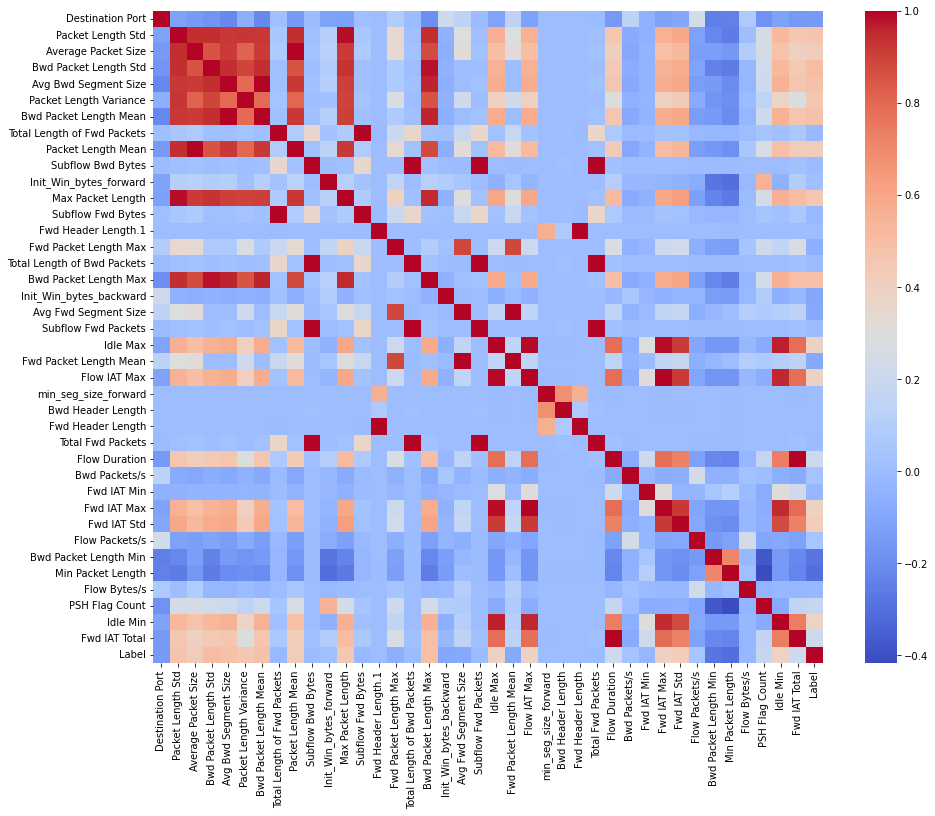

In [33]:
correlation_matrix = top_feature_df.corr()
plt.figure(figsize=(15, 12)) 
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.show()

In [46]:
correlation_threshold = 0.9
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= correlation_threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated_features.add(colname_i)
            highly_correlated_features.add(colname_j)
corr_rem_df = top_feature_df.drop(highly_correlated_features, axis=1)
corr_rem_df.shape

(2827876, 14)

In [49]:
X = corr_rem_df.drop(["Label"], axis = 1)
y = corr_rem_df["Label"]

In [50]:
mmscaler = preprocessing.MinMaxScaler()
X = mmscaler.fit_transform(X)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [55]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9963294057739367
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    454089
           1       0.99      1.00      0.99    111487

    accuracy                           1.00    565576
   macro avg       0.99      1.00      0.99    565576
weighted avg       1.00      1.00      1.00    565576



In [83]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [84]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 0.998769219712249
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    111095
           1       1.00      1.00      1.00    111528

    accuracy                           1.00    222623
   macro avg       1.00      1.00      1.00    222623
weighted avg       1.00      1.00      1.00    222623



In [73]:
corr_rem_df_0 = corr_rem_df[corr_rem_df["Label"] == 0]
corr_rem_df_1 = corr_rem_df[corr_rem_df["Label"] == 1]
corr_rem_df_0 = resample(corr_rem_df_0,
                                 replace=False,   
                                 n_samples=len(corr_rem_df_1),     
                                 random_state=42)
bal_df = pd.concat([corr_rem_df_0, corr_rem_df_1], ignore_index = True)

In [77]:
bal_df

,Destination Port,Init_Win_bytes_forward,Fwd Packet Length Max,Init_Win_bytes_backward,min_seg_size_forward,Bwd Header Length,Bwd Packets/s,Fwd IAT Min,Flow Packets/s,Bwd Packet Length Min,Min Packet Length,Flow Bytes/s,PSH Flag Count,Label
0,53,-1,34,-1,32,64,9708.737864,3,19417.475730,66,34,970873.786400,0,0
1,443,8192,1349,65535,20,124,8.862970,4,22.157424,2,0,4310.357562,1,0
2,443,29200,0,-1,40,0,0.000000,997609,0.110827,0,0,0.000000,1,0
3,53,-1,56,-1,40,20,12.613044,0,25.226089,137,56,2434.317571,0,0
4,443,65535,389,122,32,936,98.617653,1,163.229218,0,0,137772.261200,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113107,80,29200,326,235,32,168,0.434322,1,1.129236,0,0,1038.723775,1,1
1113108,80,29200,471,235,32,168,0.434279,176,0.868559,0,0,347.076105,1,1
1113109,80,29200,314,235,32,200,0.521322,255,1.129531,0,0,1037.952157,1,1
1113110,80,29200,369,235,32,168,0.434439,168,1.129541,0,0,1042.740546,1,1


In [80]:
X = bal_df.drop(["Label"], axis = 1)
y = bal_df["Label"]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [90]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9991061121267794
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    111095
           1       1.00      1.00      1.00    111528

    accuracy                           1.00    222623
   macro avg       1.00      1.00      1.00    222623
weighted avg       1.00      1.00      1.00    222623



In [101]:
y_train.value_counts()

0    445461
1    445028
Name: Label, dtype: int64

In [109]:
%%time
context = ts.context(ts.SCHEME_TYPE.CKKS, poly_modulus_degree=8192, coeff_mod_bit_sizes=[60, 40, 40, 60])
context.global_scale = 2 ** 20
enc_X_train = ts.ckks_vector(context, X_train.values.ravel().tolist())
enc_y_train = ts.ckks_vector(context, y_train.values.ravel().tolist())

The following operations are disabled in this setup: matmul, matmul_plain, enc_matmul_plain, conv2d_im2col.
If you need to use those operations, try increasing the poly_modulus parameter, to fit your input.
The following operations are disabled in this setup: matmul, matmul_plain, enc_matmul_plain, conv2d_im2col.
If you need to use those operations, try increasing the poly_modulus parameter, to fit your input.
CPU times: total: 14.2 s
Wall time: 14.2 s


In [110]:
dt = DecisionTreeClassifier()
dt.fit(enc_X_train.decrypt(), enc_y_train.decrypt())

ValueError: Expected 2D array, got 1D array instead:
array=[ 8.0000580e+01  2.7399963e+02 -2.7388207e-05 ...  6.0000644e+00
  8.0000000e+05 -8.1180240e-04].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [112]:
import torch
class EncryptedLR:
    
    def __init__(self, torch_lr):
        # TenSEAL processes lists and not torch tensors,
        # so we take out the parameters from the PyTorch model
        self.weight = torch_lr.lr.weight.data.tolist()[0]
        self.bias = torch_lr.lr.bias.data.tolist()
        
    def forward(self, enc_x):
        # We don't need to perform sigmoid as this model
        # will only be used for evaluation, and the label
        # can be deduced without applying sigmoid
        enc_out = enc_x.dot(self.weight) + self.bias
        return enc_out
    
    def __call__(self, *args, **kwargs):
        return self.forward(*args, **kwargs)
        
    ################################################
    ## You can use the functions below to perform ##
    ## the evaluation with an encrypted model     ##
    ################################################
    
    def encrypt(self, context):
        self.weight = ts.ckks_vector(context, self.weight)
        self.bias = ts.ckks_vector(context, self.bias)
        
    def decrypt(self, context):
        self.weight = self.weight.decrypt()
        self.bias = self.bias.decrypt()
        

eelr = EncryptedLR(model)

AttributeError: 'RandomForestClassifier' object has no attribute 'lr'